In [70]:
import pandas as pd
from shapely.geometry import Polygon
import re
import seaborn as sns

county_data is from https://www.kaggle.com/datasets/roche-data-science-coalition/uncover

region_data is from https://jeremyposadas.org/regions/

In [89]:
county_data = pd.read_csv('G:\My Drive\ds_projects\cdcs-social-vulnerability-index-svi-2016-overall-svi-county-level.csv')
region_data = pd.read_excel(r'G:\My Drive\ds_projects\URAmericaMapCountyList.xlsx', skiprows=3, header=0)
region_data.head(5)

,State,CountyName,CountyFIPS,Region,RegionName,DensityCat,DensityCatName,Population2016,Density2016_SqMi,Density2016_PFbF,DensityAggreg
0,Alabama,"Autauga County, Alabama",1001,1,01 Deep South,3,3 Rural/Semi-Rural,55416,925.973699,1.913169,100
1,Alabama,"Baldwin County, Alabama",1003,3,03 Gulf Coast,3,3 Rural/Semi-Rural,208563,475.934591,0.983336,100
2,Alabama,"Barbour County, Alabama",1005,1,01 Deep South,3,3 Rural/Semi-Rural,25965,139.162914,0.287527,100
3,Alabama,"Bibb County, Alabama",1007,2,02 Appohzarka,3,3 Rural/Semi-Rural,22643,51.047742,0.105471,100
4,Alabama,"Blount County, Alabama",1009,2,02 Appohzarka,3,3 Rural/Semi-Rural,57704,97.358358,0.201154,100


In [16]:
county_data.head(5)

,geometry,st,state,st_abbr,county,fips,location,area_sqmi,e_totpop,m_totpop,...,f_theme4,f_total,e_uninsur,m_uninsur,ep_uninsur,mp_uninsur,e_daypop,objectid,shape_are,shape_len
0,"POLYGON ((-86.9212008685 32.6575481071, -86.92...",1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.446120,55049,0,...,f,f,4852,649,8.9,1.2,40854,1,0.150260,2.052636
1,"POLYGON ((-86.963362945 33.8582273591, -86.959...",1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.806508,57704,0,...,f,f,6388,740,11.2,1.3,42597,2,0.164406,2.392672
2,"POLYGON ((-85.5934395044 32.8972732071, -85.59...",1,ALABAMA,AL,Chambers,1017,"Chambers County, Alabama",596.531112,34018,0,...,f,f,3979,544,11.8,1.6,27940,3,0.150587,1.714193
3,"POLYGON ((-86.1963696041 31.4254368653, -86.19...",1,ALABAMA,AL,Coffee,1031,"Coffee County, Alabama",678.985652,50991,0,...,f,f,5253,464,10.7,0.9,47236,4,0.167192,1.678611
4,"POLYGON ((-88.1392513191 34.5878014617, -88.13...",1,ALABAMA,AL,Colbert,1033,"Colbert County, Alabama",592.619664,54377,0,...,f,f,4932,458,9.1,0.8,56227,5,0.158869,2.175068


In [90]:
#Merge datasets
county_data = county_data.merge(region_data, left_on='fips', right_on='CountyFIPS')
county_data.head(5)

,geometry,st,state,st_abbr,county,fips,location,area_sqmi,e_totpop,m_totpop,...,CountyName,CountyFIPS,Region,RegionName,DensityCat,DensityCatName,Population2016,Density2016_SqMi,Density2016_PFbF,DensityAggreg
0,"POLYGON ((-86.9212008685 32.6575481071, -86.92...",1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.446120,55049,0,...,"Autauga County, Alabama",1001,1,01 Deep South,3,3 Rural/Semi-Rural,55416,925.973699,1.913169,100
1,"POLYGON ((-86.963362945 33.8582273591, -86.959...",1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.806508,57704,0,...,"Blount County, Alabama",1009,2,02 Appohzarka,3,3 Rural/Semi-Rural,57704,97.358358,0.201154,100
2,"POLYGON ((-85.5934395044 32.8972732071, -85.59...",1,ALABAMA,AL,Chambers,1017,"Chambers County, Alabama",596.531112,34018,0,...,"Chambers County, Alabama",1017,1,01 Deep South,3,3 Rural/Semi-Rural,33843,355.276725,0.734043,100
3,"POLYGON ((-86.1963696041 31.4254368653, -86.19...",1,ALABAMA,AL,Coffee,1031,"Coffee County, Alabama",678.985652,50991,0,...,"Coffee County, Alabama",1031,1,01 Deep South,3,3 Rural/Semi-Rural,51226,541.904065,1.119636,100
4,"POLYGON ((-88.1392513191 34.5878014617, -88.13...",1,ALABAMA,AL,Colbert,1033,"Colbert County, Alabama",592.619664,54377,0,...,"Colbert County, Alabama",1033,2,02 Appohzarka,3,3 Rural/Semi-Rural,54216,768.079047,1.586940,100


In [91]:
# Convert r Polygon text to shapely polygon
for row_idx, row in county_data.iterrows():
    points = re.findall(r'-?\d+.\d+', row['geometry'])
    i = 0
    list_points = []
    while i < len(points):
        list_points.append((float(points[i]), float(points[i+1])))
        i+=2
    list_points

    county_shape = Polygon(list_points)
    county_center = county_shape.centroid
    center_points = re.findall(r'-?\d+.\d+', county_center.wkt)
    county_data.at[row_idx, 'center_long'] = float(center_points[0])
    county_data.at[row_idx, 'center_lat'] = float(center_points[1])
    
county_data.head()

,geometry,st,state,st_abbr,county,fips,location,area_sqmi,e_totpop,m_totpop,...,Region,RegionName,DensityCat,DensityCatName,Population2016,Density2016_SqMi,Density2016_PFbF,DensityAggreg,center_long,center_lat
0,"POLYGON ((-86.9212008685 32.6575481071, -86.92...",1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.446120,55049,0,...,1,01 Deep South,3,3 Rural/Semi-Rural,55416,925.973699,1.913169,100,-86.642748,32.534928
1,"POLYGON ((-86.963362945 33.8582273591, -86.959...",1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.806508,57704,0,...,2,02 Appohzarka,3,3 Rural/Semi-Rural,57704,97.358358,0.201154,100,-86.567383,33.980878
2,"POLYGON ((-85.5934395044 32.8972732071, -85.59...",1,ALABAMA,AL,Chambers,1017,"Chambers County, Alabama",596.531112,34018,0,...,1,01 Deep South,3,3 Rural/Semi-Rural,33843,355.276725,0.734043,100,-85.392033,32.914353
3,"POLYGON ((-86.1963696041 31.4254368653, -86.19...",1,ALABAMA,AL,Coffee,1031,"Coffee County, Alabama",678.985652,50991,0,...,1,01 Deep South,3,3 Rural/Semi-Rural,51226,541.904065,1.119636,100,-85.988159,31.402652
4,"POLYGON ((-88.1392513191 34.5878014617, -88.13...",1,ALABAMA,AL,Colbert,1033,"Colbert County, Alabama",592.619664,54377,0,...,2,02 Appohzarka,3,3 Rural/Semi-Rural,54216,768.079047,1.586940,100,-87.804934,34.700477


,geometry,st,state,st_abbr,county,fips,location,area_sqmi,e_totpop,m_totpop,...,DensityCatName,Population2016,Density2016_SqMi,Density2016_PFbF,DensityAggreg,center_x,center_y,center_coords,center_long,center_lat
2942,"POLYGON ((-167.852246691 53.3110997116, -167.8...",2,ALASKA,AK,Aleutians West,2016,"Aleutians West Census Area, Alaska",4390.257721,5714,0,...,3 Rural/Semi-Rural,5647,3.614802,0.007469,100,173.163315,53.407653,NaN,9.982018,52.10642


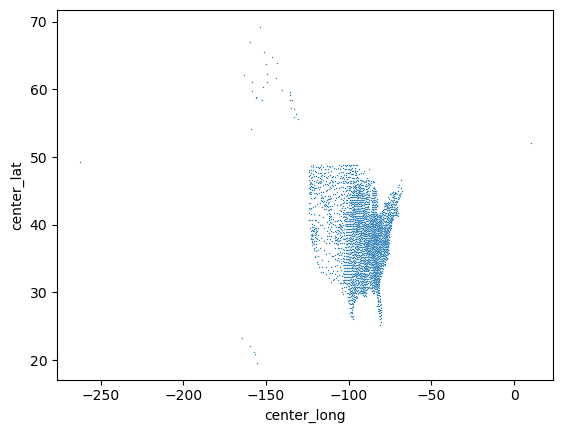

In [84]:
sns.scatterplot(county_data, x='center_long', y='center_lat', s=1)

<AxesSubplot:xlabel='center_long', ylabel='center_lat'>

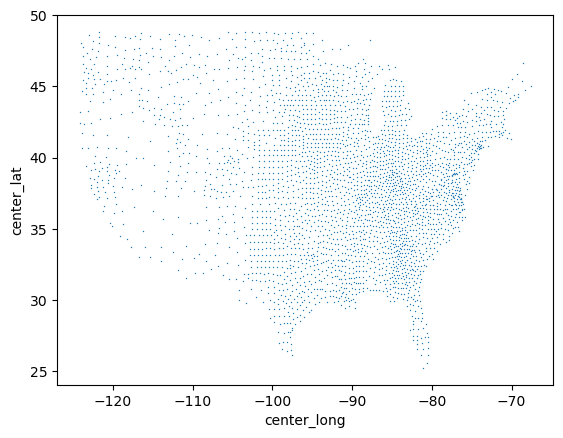

In [92]:
#Drop data from outside the continental US
county_data = county_data[county_data['center_long']<-50]
county_data = county_data[county_data['center_long']>-125]
county_data = county_data[county_data['center_lat']<50]
sns.scatterplot(county_data, x='center_long', y='center_lat', s=1)

TODO:
Try predicting region
Try creating regions by clustering